<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue


In [3]:
# Function to generate a random maze
def generate_maze(rows, cols):
    maze = np.random.choice([0, 1], size=(rows, cols), p=[0.7, 0.3])
    maze[0, 0] = 0  # Start point
    maze[rows - 1, cols - 1] = 0  # End point
    return maze

In [4]:
# Function to visualize the maze with optional path
def visualize_maze(maze, start, end, path=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(maze, cmap="binary")
    if path:
        for r, c in path:
            plt.scatter(c, r, color="red", s=10)  # Path in red
    plt.scatter(start[1], start[0], color="green", label="Start")  # Start in green
    plt.scatter(end[1], end[0], color="blue", label="End")  # End in blue
    plt.legend()
    plt.show()


In [5]:
# BFS algorithm to find the shortest path
def solve_bfs(maze, start, end):
    rows, cols = maze.shape
    visited = set()
    queue = Queue()
    queue.put((start, [start]))

    while not queue.empty():
        current, path = queue.get()
        if current == end:
            return path

        r, c = current
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in visited and maze[nr, nc] == 0:
                visited.add((nr, nc))
                queue.put(((nr, nc), path + [(nr, nc)]))

    return None



In [6]:
# DFS algorithm to find a path
def solve_dfs(maze, start, end):
    rows, cols = maze.shape
    visited = set()
    stack = [(start, [start])]

    while stack:
        current, path = stack.pop()
        if current == end:
            return path

        r, c = current
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and (nr, nc) not in visited and maze[nr, nc] == 0:
                visited.add((nr, nc))
                stack.append(((nr, nc), path + [(nr, nc)]))

    return None

In [7]:
# Main function to interact with the user
def main():
    rows, cols = 12, 12  # Default maze size
    maze = generate_maze(rows, cols)
    start = (0, 0)
    end = (rows - 1, cols - 1)

    while True:
        print("\nOptions:")
        print("1. Solve using BFS")
        print("2. Solve using DFS")
        print("3. Regenerate Maze")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            print("Running BFS...")
            path = solve_bfs(maze, start, end)
            if path:
                print(f"Path found! Length: {len(path)}")
                visualize_maze(maze, start, end, path)
            else:
                print("No path found!")

        elif choice == "2":
            print("Running DFS...")
            path = solve_dfs(maze, start, end)
            if path:
                print(f"Path found! Length: {len(path)}")
                visualize_maze(maze, start, end, path)
            else:
                print("No path found!")

        elif choice == "3":
            print("Regenerating maze...")
            maze = generate_maze(rows, cols)
            visualize_maze(maze, start, end)

        elif choice == "4":
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please try again.")


Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Enter your choice: 1
Running BFS...
Path found! Length: 25


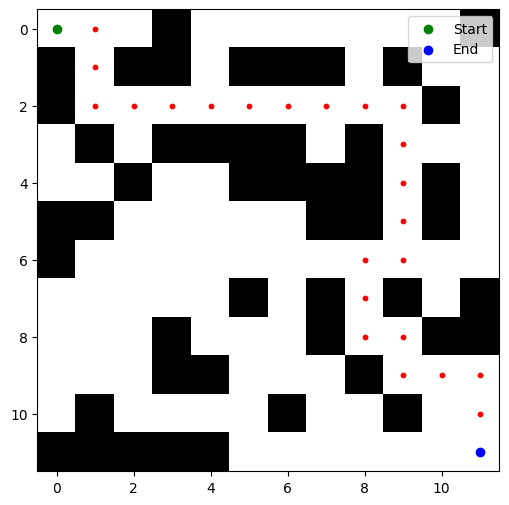


Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Enter your choice: 2
Running DFS...
Path found! Length: 49


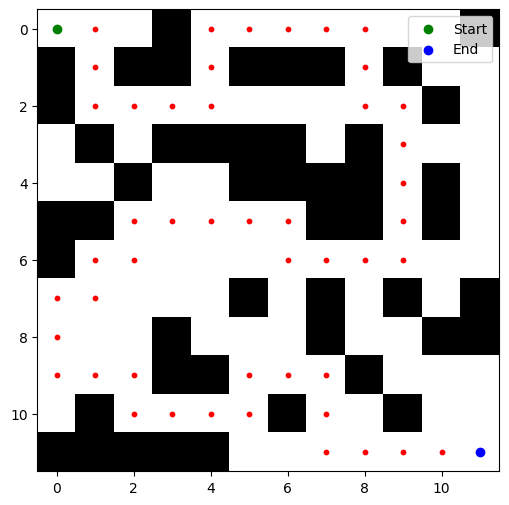


Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Enter your choice: 3
Regenerating maze...


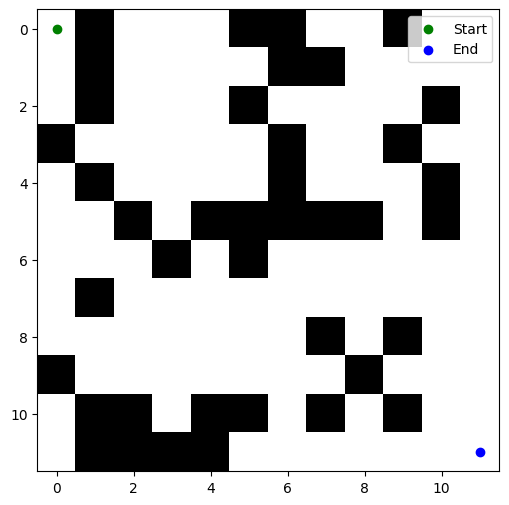


Options:
1. Solve using BFS
2. Solve using DFS
3. Regenerate Maze
4. Exit
Enter your choice: 4
Exiting...


In [8]:
# Run the main function
if __name__ == "__main__":
    main()